# Import Lib

In [1]:
import pwk as pwk

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

import os, time, sys
import h5py

Init Plugin
Init Graph Optimizer
Init Kernel


# Load Dataset

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


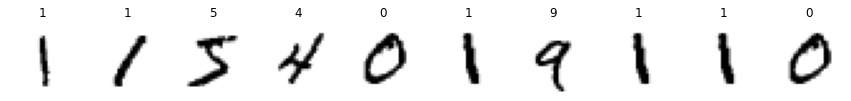

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

pwk.plot_some_values(x_train, y_train, 10)

# Normalized

In [3]:
x_train, x_test = x_train/255, x_test/255

# Create train, val, test

In [4]:
#join train and test
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

#split eval set
train_size = 65/70 #to obatain 65 000 
x_train, x_eval, y_train, y_eval = train_test_split(x, y, train_size=train_size, random_state=42)

#split train and test set
train_size = 55/65
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=train_size, random_state=42)

print("Data to train the CNN models :")
print("\tx_train : ",x_train.shape)
print("\ty_train : ",y_train.shape)

print("\nData to test the accuracy of the models :")
print("\tx_test  : ",x_test.shape)
print("\ty_test  : ",y_test.shape)

print("\nData to evaluate the best model in production :")
print("\tx_eval  : ",x_eval.shape)
print("\ty_eval  : ",y_eval.shape)

Data to train the CNN models :
	x_train :  (55000, 28, 28, 1)
	y_train :  (55000,)

Data to test the accuracy of the models :
	x_test  :  (10000, 28, 28, 1)
	y_test  :  (10000,)

Data to evaluate the best model in production :
	x_eval  :  (5000, 28, 28, 1)
	y_eval  :  (5000,)


check train set :


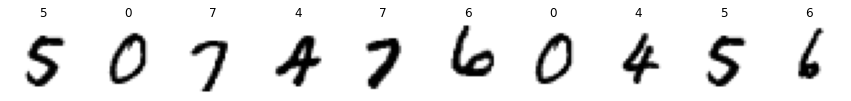

In [5]:
print('check train set :')
pwk.plot_some_values(x_train, y_train, 10)

check test set :


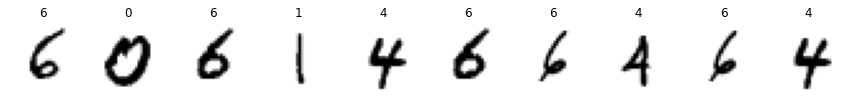

In [6]:
print('check test set :')
pwk.plot_some_values(x_test, y_test, 10)

check eval set :


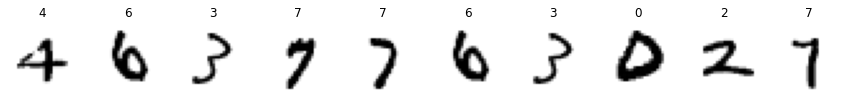

In [7]:
print('check eval set :')
pwk.plot_some_values(x_eval, y_eval, 10)

# save as h5 format

## functions

In [8]:
def save_h5_dataset(x_train, y_train, x_test, y_test, x_eval, y_eval, filename):

    # ---- Create h5 file
    with h5py.File(filename, "w") as f:
        f.create_dataset("x_train", data=x_train)
        f.create_dataset("y_train", data=y_train)
        f.create_dataset("x_test",  data=x_test)
        f.create_dataset("y_test",  data=y_test)
        f.create_dataset("x_eval",  data=x_eval)
        f.create_dataset("y_eval",  data=y_eval)
        
    # ---- done
    size=os.path.getsize(filename)/(1024*1024)
    print('Dataset : {:24s} size : {:6.1f} Mo   (saved)'.format(filename, size))


In [9]:
def load_h5_dataset(filename):
    
    with  h5py.File(filename,'r') as f:
        x_tmp_train = f['x_train'][:]
        y_tmp_train = f['y_train'][:]
        x_tmp_test  = f['x_test'][:]
        y_tmp_test  = f['y_test'][:]
        x_tmp_eval  = f['x_eval'][:]
        y_tmp_eval  = f['y_eval'][:]

        print("\ndataset loaded from h5 file.")
        print(f'x_train : {x_tmp_train.shape}')
        print(f'y_train : {y_tmp_train.shape}')
        print(f'x_test  : {x_tmp_test.shape}')
        print(f'y_test  : {y_tmp_test.shape}')
        print(f'x_test  : {x_tmp_test.shape}')
        print(f'y_test  : {y_tmp_test.shape}')
    
    return (x_tmp_train, y_tmp_train), (x_tmp_test, y_tmp_test), (x_tmp_eval, y_tmp_eval)

## save

In [10]:
data_dir = 'data/minst_train_test_eval.h5'
save_h5_dataset(x_train, y_train, x_test, y_test, x_eval, y_eval, data_dir)

Dataset : data/minst_train_test_eval.h5 size :  418.8 Mo   (saved)


## check

In [12]:
(x_tmp_train, y_tmp_train), (x_tmp_test, y_tmp_test), (x_tmp_eval, y_tmp_eval) = load_h5_dataset(data_dir)


dataset loaded from h5 file.
x_train : (55000, 28, 28, 1)
y_train : (55000,)
x_test  : (10000, 28, 28, 1)
y_test  : (10000,)
x_test  : (10000, 28, 28, 1)
y_test  : (10000,)


In [18]:
print((x_tmp_eval - x_eval).sum())
print((y_tmp_eval - y_eval).sum())

print((x_tmp_test - x_test).sum())
print((y_tmp_test - y_test).sum())

print((x_tmp_train - x_train).sum())
print((y_tmp_train - y_train).sum())

0.0
0
0.0
0
0.0
0
